In [3]:
!pip install -U -q ultralytics roboflow wandb opencv-python-headless matplotlib

In [4]:
import torch
print("Torch CUDA available:", torch.cuda.is_available(), "cuda:", torch.version.cuda)

Torch CUDA available: True cuda: 12.6


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!mkdir -p /content/drive/MyDrive/YOLOv8_surgical

In [7]:
!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="PFN4A7FKw5wg0Uw62akT")
project = rf.workspace("pattern-recognition-and-computer-vision").project("surgical-tool-detection-yjfvl")
version = project.version(5)
dataset_dir = version.download("yolov8")
print("Downloaded to:", dataset_dir)

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Surgical-Tool-Detection--5 in yolov8:: 100%|██████████| 4232/4232 [00:00<00:00, 5545.79it/s]

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Downloaded to: <roboflow.core.dataset.Dataset object at 0x7ea6bb6fbe30>


In [8]:
import os, random, matplotlib.pyplot as plt, cv2

In [14]:
base = dataset_dir.location
print("Base folder listing:", os.listdir("/content"))
print("Dataset folder listing:", os.listdir(base))

Base folder listing: ['.config', 'Surgical-Tool-Detection--5', 'drive', 'sample_data']
Dataset folder listing: ['README.roboflow.txt', 'test', 'README.dataset.txt', 'data.yaml', 'valid', 'train']


train images: 1478
valid images: 421
test images: 211


(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

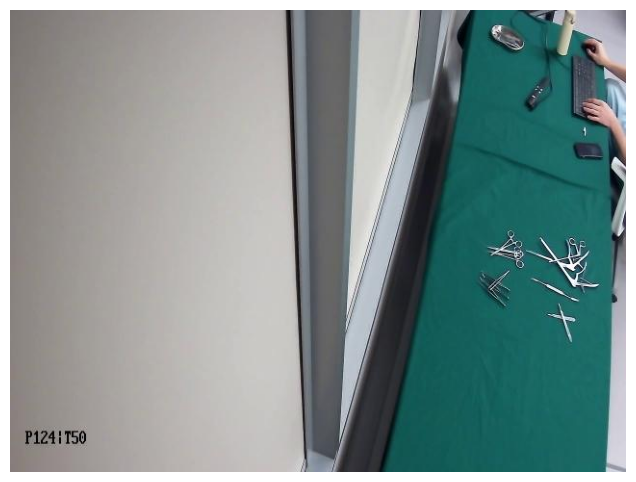

In [15]:
for split in ["train","valid","test"]:
    p = os.path.join(base, split, "images")
    if os.path.exists(p):
        print(split, "images:", len(os.listdir(p)))

img_path = random.choice([os.path.join(base, 'train', 'images', f) for f in os.listdir(os.path.join(base, 'train', 'images')) if f.endswith((".jpg",".png"))])
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.axis('off')

In [18]:
from ultralytics import YOLO

# Load model
model = YOLO("yolov8n.pt")

# Train
results = model.train(
    data=os.path.join(dataset_dir.location, "data.yaml"),
    epochs=50,
    imgsz=640,
    batch=16,
    project="/content/drive/MyDrive/YOLOv8_surgical",
    name="exp_yolov8n_50",
    save=True,
    device=0
)

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Surgical-Tool-Detection--5/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=exp_yolov8n_502, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective

In [19]:
import glob, os
run_dir = sorted(glob.glob("/content/drive/MyDrive/YOLOv8_surgical/exp_yolov8n_50*"))[-1]
print("Run dir:", run_dir)


Run dir: /content/drive/MyDrive/YOLOv8_surgical/exp_yolov8n_502


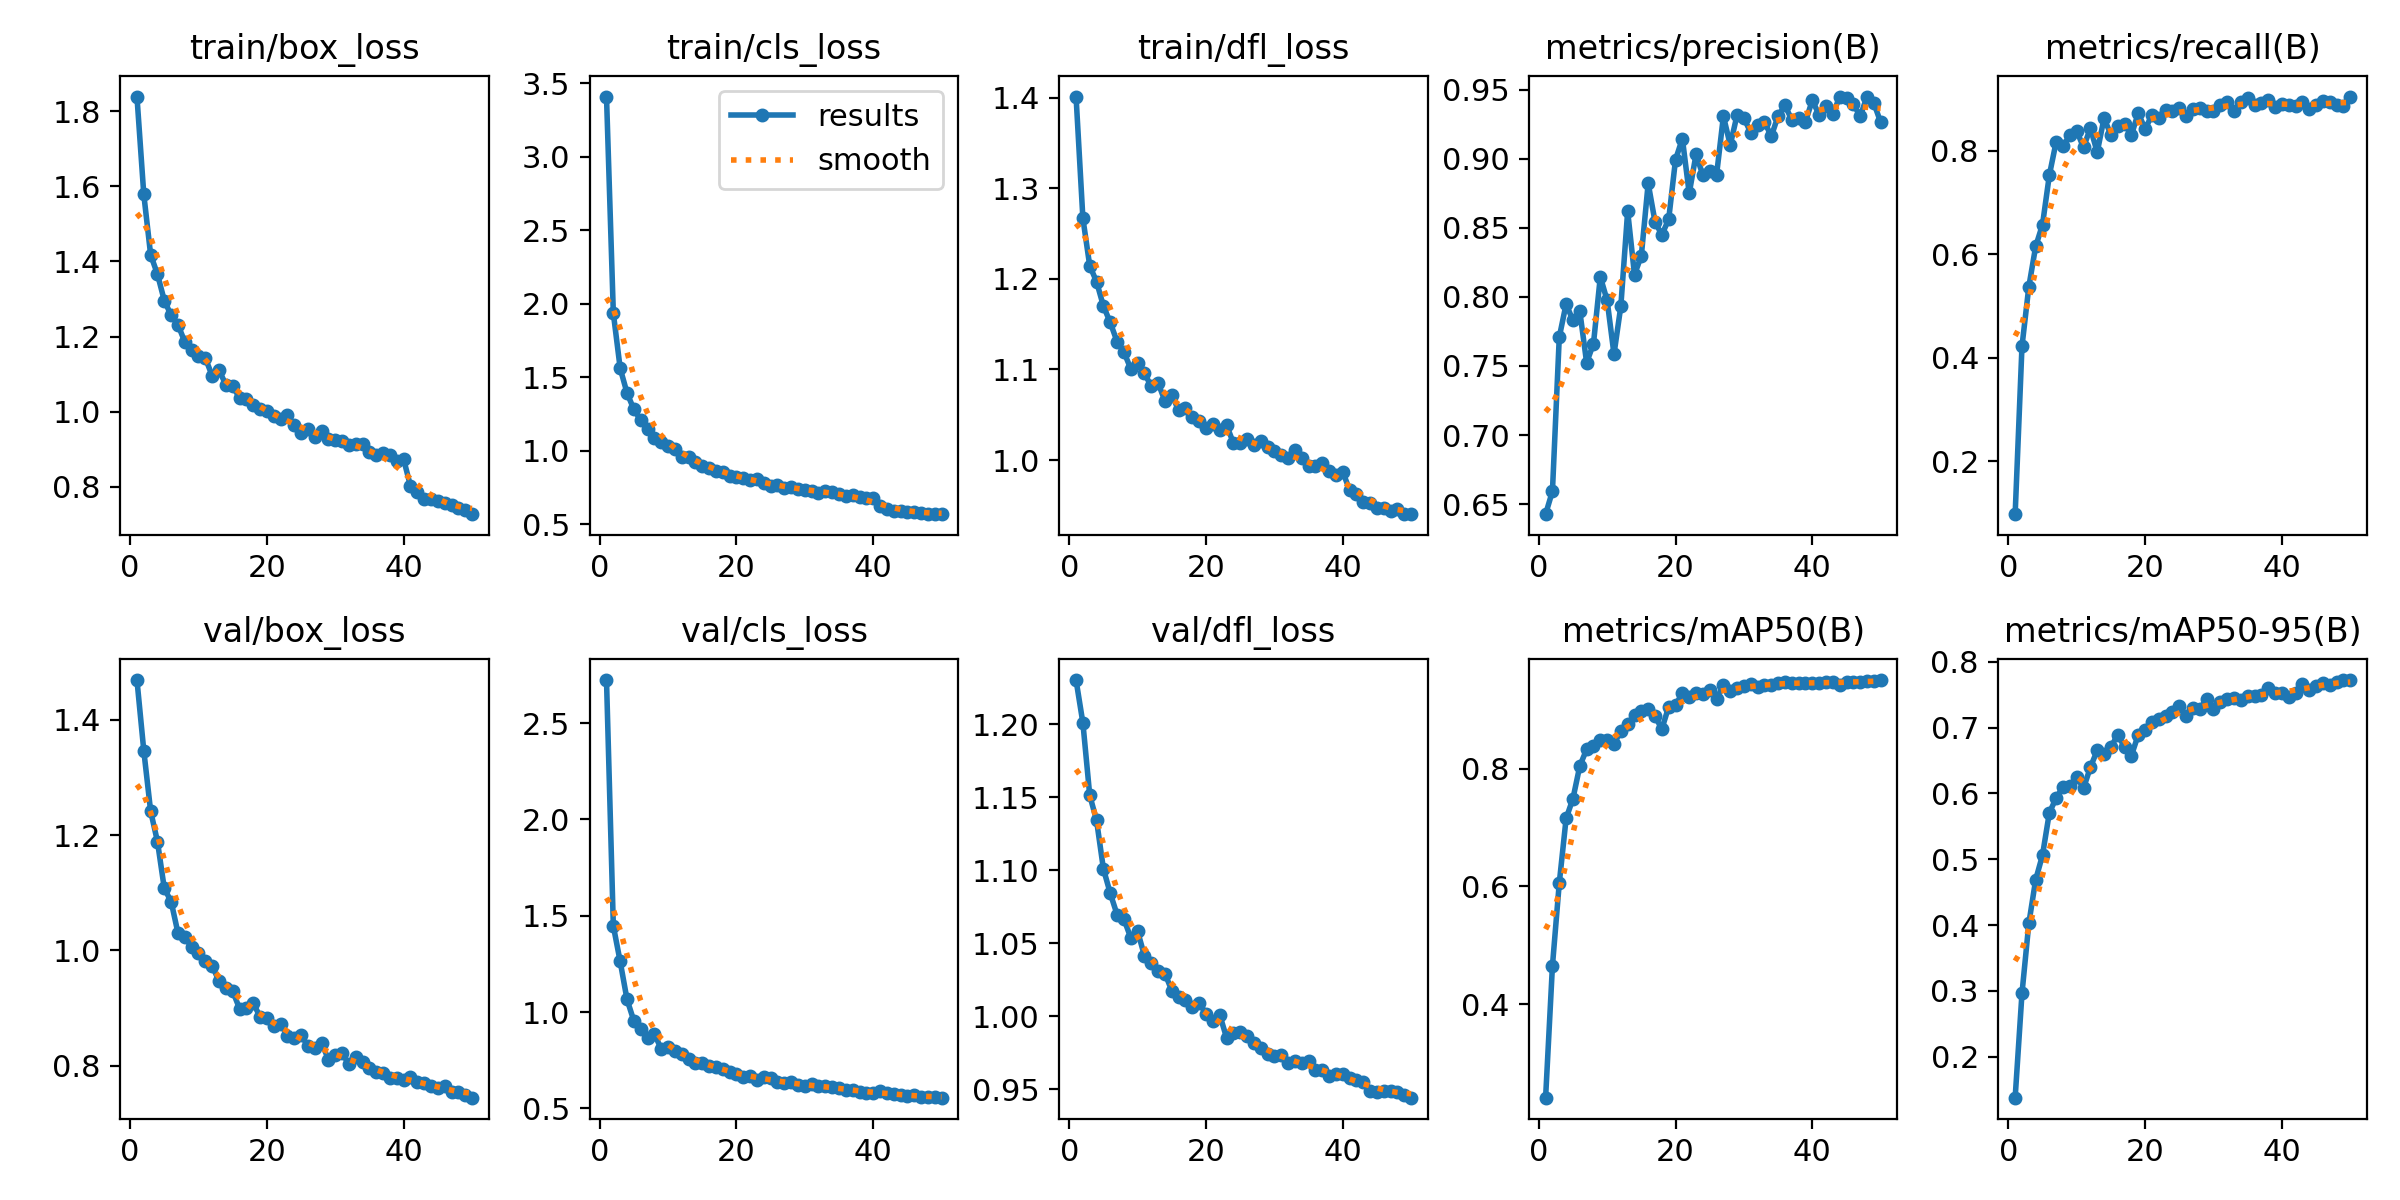

In [20]:
from PIL import Image, ImageOps
img = Image.open(os.path.join(run_dir, "results.png"))
display(img)

# **Inference**

In [23]:
from ultralytics import YOLO
model = YOLO(os.path.join(run_dir, "weights", "best.pt"))

val_img = dataset_dir.location + "/valid/images"
out_folder = "/content/predictions"
!mkdir -p {out_folder}
results = model.predict(source=val_img, save=True, save_dir=out_folder, conf=0.35, imgsz=640)
print("Saved predictions to", out_folder)


image 1/421 /content/Surgical-Tool-Detection--5/valid/images/-10_cross1_142_png.rf.9e462fa77d73f4bb425a6d7fad7cf827.jpg: 480x640 2 artery_forcepss, 1 bending_shear, 2 rongeur_forceps_1s, 1 scalpel, 1 stripping, 5 tweezerss, 1 wire_grabbing_pliers, 44.6ms
image 2/421 /content/Surgical-Tool-Detection--5/valid/images/-10_hand1_134_png.rf.2bdf4658f8519055c3e01e5a30567d19.jpg: 480x640 3 artery_forcepss, 1 bending_shear, 2 rongeur_forceps_1s, 2 scalpels, 1 stripping, 3 tweezerss, 1 wire_grabbing_pliers, 6.9ms
image 3/421 /content/Surgical-Tool-Detection--5/valid/images/-10_rgb_1681215660-2910941_png.rf.1342538fbb2a34f6ac85014c5ddbe519.jpg: 480x640 1 rongeur_forceps_1, 2 scalpels, 1 stripping, 1 tweezers, 1 wire_grabbing_pliers, 5.9ms
image 4/421 /content/Surgical-Tool-Detection--5/valid/images/-11_rgb_1681216993-9675820_png.rf.25d8e5725920802fca088c24528f05d8.jpg: 480x640 3 artery_forcepss, 1 bending_shear, 5.9ms
image 5/421 /content/Surgical-Tool-Detection--5/valid/images/-12_rgb_168121563

In [24]:
!yolo export model={run_dir}/weights/best.pt format=onnx

Ultralytics 8.3.225 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
Model summary (fused): 72 layers, 3,008,378 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/YOLOv8_surgical/exp_yolov8n_502/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 18, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 3.0s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.20.0rc1 opset 22...
WARNING ⚠️ ONNX: simplifier failure: module 'onnx.helper' has no attribute 'float32_to_bfloat16'
ONNX: export success ✅ 4.3s, saved as '/content/drive/MyDrive/YOLOv8_surgical/exp_yolov8n_502/weights/best.

(np.float64(-0.5), np.float64(639.5), np.float64(479.5), np.float64(-0.5))

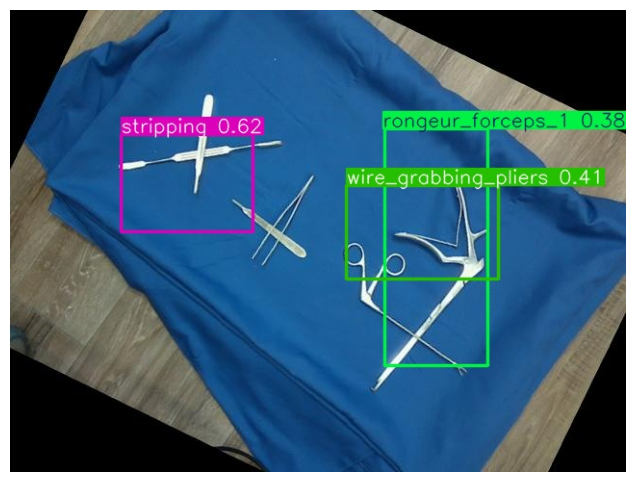

In [ ]:
pred_img_path = random.choice([os.path.join('/content/runs/detect/predict/'+ img) for img in os.listdir('/content/runs/detect/predict')])
pred_img = cv2.cvtColor(cv2.imread(pred_img_path), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(pred_img)
plt.axis('off')
# Save the prediction image for README
plt.savefig('docs/prediction_demo.png', bbox_inches='tight', pad_inches=0)
plt.close()